In [106]:
import polars as pl
import numpy as np
import warnings
import matplotlib.pyplot as plt
from datetime import timedelta

warnings.filterwarnings("ignore")
commission = 0.25 / 10000.0

In [107]:
path = "data/hour_agg_data_small.parquet"
path = 'production/data/hour_factor.parquet'
path = 'data/hour_agg_data_small.parquet'
path = '../production/hour_factor.parquet'
path = 'data/small_hour_factor.parquet'

input_df = pl.read_parquet(path)
input_df = input_df.sort([ 'open_time', 'symbol'])

input_df

shape: (340_016, 66)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ open_time ┆ open      ┆ high      ┆ low       ┆ … ┆ linear_co ┆ linear_co ┆ linear_co ┆ linear_c │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ mpound_fa ┆ mpound_fa ┆ mpound_fa ┆ ompound_ │
│ datetime[ ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ctor_7day ┆ ctor_8day ┆ ctor_9day ┆ factor_1 │
│ ms]       ┆           ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆ 0day     │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ f64       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2024-07-3 ┆ 0.026385  ┆ 0.026727  ┆ 0.026245  ┆ … ┆ 0.021371  ┆ 0.020157  ┆ 0.021695  ┆ 0.021479 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.16992   ┆ 0.17143   ┆ 0.16811   ┆ … ┆ -0.002754 ┆ -0.003546 ┆ -0.002785 ┆ -0.00261 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 8        │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.0807    ┆ 0.08128   ┆ 0.08022   ┆ … ┆ 0.029487  ┆ 0.030688  ┆ 0.033222  ┆ 0.033984 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.0114478 ┆ 0.0115573 ┆ 0.0113534 ┆ … ┆ 0.022166  ┆ 0.020688  ┆ 0.022176  ┆ 0.021831 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.13646   ┆ 0.13674   ┆ 0.13343   ┆ … ┆ 0.012135  ┆ 0.011807  ┆ 0.010685  ┆ 0.010096 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2024-09-2 ┆ 0.6563    ┆ 0.6616    ┆ 0.6445    ┆ … ┆ 0.002888  ┆ 0.003544  ┆ 0.004498  ┆ 0.004073 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.01492   ┆ 0.01499   ┆ 0.01489   ┆ … ┆ 0.021906  ┆ 0.025085  ┆ 0.027127  ┆ 0.03025  │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.12208   ┆ 0.12243   ┆ 0.12187   ┆ … ┆ 0.01153   ┆ 0.012466  ┆ 0.01324   ┆ 0.014045 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 4.2131    ┆ 4.249     ┆ 4.2112    ┆ … ┆ -0.028991 ┆ -0.030199 ┆ -0.032868 ┆ -0.03320 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 8        │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.3277    ┆ 0.3281    ┆ 0.3268    ┆ … ┆ 0.018105  ┆ 0.022118  ┆ 0.025554  ┆ 0.030464 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───

In [108]:
input_df.columns

['open_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'close_time',
 'quote_volume',
 'count',
 'taker_buy_volume',
 'taker_buy_quote_volume',
 'ignore',
 'symbol',
 'past_1day_close_return',
 'return',
 'close_price_fut_1day_ret',
 'open_price_fut_1day_ret',
 'amihud',
 'alpha30',
 'alpha36',
 'alpha45',
 'alpha40',
 'past_2day_close_return',
 'past_3day_close_return',
 'past_4day_close_return',
 'past_5day_close_return',
 'past_6day_close_return',
 'past_7day_close_return',
 'past_8day_close_return',
 'past_9day_close_return',
 'past_10day_close_return',
 'open_price_volatility',
 'close_price_volatility',
 'alpha30_right',
 'alpha36_right',
 'alpha45_right',
 'alpha40_right',
 'close_price_fut_2day_ret',
 'open_price_fut_2day_ret',
 'close_price_fut_3day_ret',
 'open_price_fut_3day_ret',
 'close_price_fut_4day_ret',
 'open_price_fut_4day_ret',
 'close_price_fut_5day_ret',
 'open_price_fut_5day_ret',
 'close_price_fut_6day_ret',
 'open_price_fut_6day_ret',
 'close_price_fut_7

In [109]:
input_df.filter (pl.col ('symbol') == 'BTCUSDT').sort ('open_time')

shape: (0, 66)
┌──────────────┬──────┬──────┬─────┬───┬──────────────┬──────────────┬──────────────┬──────────────┐
│ open_time    ┆ open ┆ high ┆ low ┆ … ┆ linear_compo ┆ linear_compo ┆ linear_compo ┆ linear_compo │
│ ---          ┆ ---  ┆ ---  ┆ --- ┆   ┆ und_factor_7 ┆ und_factor_8 ┆ und_factor_9 ┆ und_factor_1 │
│ datetime[ms] ┆ f64  ┆ f64  ┆ f64 ┆   ┆ day          ┆ day          ┆ day          ┆ 0day         │
│              ┆      ┆      ┆     ┆   ┆ ---          ┆ ---          ┆ ---          ┆ ---          │
│              ┆      ┆      ┆     ┆   ┆ f64          ┆ f64          ┆ f64          ┆ f64          │
╞══════════════╪══════╪══════╪═════╪═══╪══════════════╪══════════════╪══════════════╪══════════════╡
└──────────────┴──────┴──────┴─────┴───┴──────────────┴──────────────┴──────────────┴──────────────┘

In [110]:
import polars as pl
import numpy as np
from scipy.stats import kendalltau, skew, kurtosis, spearmanr


def calc_auto_kendall_corr(df: pl.DataFrame, result_column_name = 'return_auto_corr', lag_list: list = [1]) -> pl.DataFrame:
    input_list = df['return'].to_list()
    n = len(input_list)
    auto_corr_pearson = [[] for _ in range(len(lag_list))]
    auto_corr_spearman = [[] for _ in range(len(lag_list))]
    auto_corr_kendall = [[] for _ in range(len(lag_list))]
    running_skewness = []
    running_kurtosis = []

    # print (lag_list, len (lag_list))
    # print ('before start: ', len (auto_corr_pearson), len (auto_corr_spearman), len (auto_corr_kendall))
    
    for i in range(0, n):
        for lag_index, lag in enumerate(lag_list):
            # print ('i: ', i, '  lag_index: ', lag_index, '  lag: ', lag)
            # calc kendall tau auto_corr
            if i < lag:
                # auto_corr.append(np.nan)
                auto_corr_pearson[lag_index].append(np.nan)
                auto_corr_spearman[lag_index].append(np.nan)
                auto_corr_kendall[lag_index].append(np.nan)
            else:
                # print ('==== not NaN')
                a = input_list[lag:i + 1]
                b = input_list[0 : i + 1 - lag]

                auto_corr_pearson[lag_index].append(np.corrcoef(a, b)[0, 1])
                auto_corr_spearman[lag_index].append(spearmanr(a, b)[0])
                auto_corr_kendall[lag_index].append(kendalltau(a, b)[0])


        # calc skew
        current_skewness = skew(input_list[:i], bias=False) if i > 2 else np.nan  # skew requires at least 3 values to compute
        running_skewness.append(current_skewness)

        # calc kurtosis
        current_kurtosis = kurtosis(input_list[:i], bias=False) if i > 2 else np.nan  # kurtosis also requires at least 3 values
        running_kurtosis.append(current_kurtosis)
    
    # print (f'input: {df.shape} ===  skew {len(running_skewness)} == kurtosis {len(running_kurtosis)}')
    # for i in range(len(lag_list)):
    #     print (f'lag {lag_list[i]} === pearson {len(auto_corr_pearson[i])} == spearman {len(auto_corr_spearman[i])} == kendall {len(auto_corr_kendall[i])}')

    assert len (lag_list) == len (auto_corr_pearson) == len (auto_corr_spearman) == len (auto_corr_kendall), f'lag_list: {len(lag_list)} == auto_corr_pearson: {len(auto_corr_pearson)} == auto_corr_spearman: {len(auto_corr_spearman)} == auto_corr_kendall: {len(auto_corr_kendall)}'

    # auto_corr_series = [
    #     pl.Series(name=f'{result_column_name}_pearson_lag{lag}', values = cur_auto_corr_pearson),
    #     pl.Series(name=f'{result_column_name}_sprearman_lag{lag}', values = cur_auto_corr_sprearman),
    #     pl.Series(name=f'{result_column_name}_kendall_lag{lag}', values = cur_auto_corr_kendall)
    #     for lag, cur_auto_corr_pearson, cur_auto_corr_sprearman, cur_auto_corr_kendall in zip(lag_list, auto_corr_pearson, auto_corr_spearman, auto_corr_kendall)
    # ]

    # auto_corr_series = [
    # pl.Series(name=f'{result_column_name}_pearson_lag{lag}', values = auto_corr_pearson[lag_index])
    # # pl.Series(name=f'{result_column_name}_spearman_lag{lag}', values = auto_corr_spearman[lag_index]),
    # # pl.Series(name=f'{result_column_name}_kendall_lag{lag}', values = auto_corr_kendall[lag_index])
    # for lag_index, lag in enumerate(lag_list)
    # ]

    auto_corr_series = [
    series
    for lag_index, lag in enumerate(lag_list)
        for series in [
            pl.Series(name=f'{result_column_name}_pearson_lag{lag}', values=auto_corr_pearson[lag_index]),
            pl.Series(name=f'{result_column_name}_spearman_lag{lag}', values=auto_corr_spearman[lag_index]),
            pl.Series(name=f'{result_column_name}_kendall_lag{lag}', values=auto_corr_kendall[lag_index])
        ]
    ]

    additional_series = [
        pl.Series(name='return_skew', values=running_skewness),
        pl.Series(name='return_kurtosis', values=running_kurtosis)
    ]

    return df.with_columns (auto_corr_series + additional_series)

### Choose one factor to test (called FACTOR_NAME)

In [111]:
IF_NORM_FACTOR = 0

FACTOR_NAME = 'amihud'
FACTOR_NAME = 'alpha30'
FACTOR_NAME = 'linear_compound_factor_1day'

print ('FACTOR_NAME:', FACTOR_NAME)

close = input_df[["open_time", "symbol", "close"]].pivot(index="open_time", columns="symbol", values="close").sort("open_time")
factors = input_df[["open_time", "symbol", FACTOR_NAME]].pivot(index="open_time", columns="symbol", values = FACTOR_NAME).sort("open_time")

columns = close.columns[1:]
print (f'columns: {columns}')
print ('factors shape:', factors.shape)
# factors.fill_nan(0).describe()
factors.describe()

FACTOR_NAME: linear_compound_factor_1day
columns: ['1000BONKUSDT', '1000FLOKIUSDT', '1000LUNCUSDT', '1000PEPEUSDT', '1000RATSUSDT', '1000SATSUSDT', '1000SHIBUSDT', '1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ACEUSDT', 'ACHUSDT', 'ADAUSDT', 'AEVOUSDT', 'AGIXUSDT', 'AGLDUSDT', 'AIUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ALTUSDT', 'AMBUSDT', 'ANKRUSDT', 'APEUSDT', 'API3USDT', 'APTUSDT', 'ARBUSDT', 'ARKMUSDT', 'ARKUSDT', 'ARPAUSDT', 'ARUSDT', 'ASTRUSDT', 'ATAUSDT', 'ATOMUSDT', 'AUCTIONUSDT', 'AXLUSDT', 'AXSUSDT', 'BADGERUSDT', 'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BATUSDT', 'BBUSDT', 'BEAMXUSDT', 'BELUSDT', 'BICOUSDT', 'BIGTIMEUSDT', 'BLURUSDT', 'BLZUSDT', 'BNBUSDT', 'BNTUSDT', 'BNXUSDT', 'BOMEUSDT', 'BONDUSDT', 'BSVUSDT', 'C98USDT', 'CAKEUSDT', 'CELOUSDT', 'CELRUSDT', 'CFXUSDT', 'CHRUSDT', 'CHZUSDT', 'CKBUSDT', 'COMBOUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVCUSDT', 'CVXUSDT', 'CYBERUSDT', 'DARUSDT', 'DASHUSDT', 'DEFIUSDT', 'DENTUSDT', 'DGBUSDT', 'DODOXUSDT', 'DO

shape: (9, 271)
┌───────────┬───────────┬───────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ statistic ┆ open_time ┆ 1000BONKU ┆ 1000FLOKI ┆ … ┆ ZILUSDT  ┆ ZKUSDT    ┆ ZROUSDT   ┆ ZRXUSDT   │
│ ---       ┆ ---       ┆ SDT       ┆ USDT      ┆   ┆ ---      ┆ ---       ┆ ---       ┆ ---       │
│ str       ┆ str       ┆ ---       ┆ ---       ┆   ┆ f64      ┆ f64       ┆ f64       ┆ f64       │
│           ┆           ┆ f64       ┆ f64       ┆   ┆          ┆           ┆           ┆           │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ count     ┆ 1264      ┆ 1264.0    ┆ 1264.0    ┆ … ┆ 1264.0   ┆ 1264.0    ┆ 1264.0    ┆ 1264.0    │
│ null_coun ┆ 0         ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0      ┆ 0.0       ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ mean      ┆ 2024-08-2 ┆ 0.004162  ┆ 0.003518  ┆ … ┆ 0.00806  ┆ 0.004404  ┆ 0.002197  ┆ 0.007309  │
│           ┆ 6         ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│           ┆ 23:30:00  ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ std       ┆ null      ┆ 0.001946  ┆ 0.002766  ┆ … ┆ 0.002224 ┆ 0.002489  ┆ 0.004614  ┆ 0.003849  │
│ min       ┆ 2024-07-3 ┆ 0.000201  ┆ -0.004057 ┆ … ┆ 0.002376 ┆ -0.002373 ┆ -0.009937 ┆ -0.003731 │
│           ┆ 1         ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│           ┆ 16:00:00  ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ 25%       ┆ 2024-08-1 ┆ 0.002741  ┆ 0.00165   ┆ … ┆ 0.006475 ┆ 0.002632  ┆ -0.001071 ┆ 0.004781  │
│           ┆ 3         ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│           ┆ 20:00:00  ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ 50%       ┆ 2024-08-2 ┆ 0.003942  ┆ 0.003266  ┆ … ┆ 0.007853 ┆ 0.004287  ┆ 0.001723  ┆ 0.007114  │
│           ┆ 7         ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│           ┆ 00:00:00  ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ 75%       ┆ 2024-09-0 ┆ 0.005334  ┆ 0.005202  ┆ … ┆ 0.009401 ┆ 0.005956  ┆ 0.005095  ┆ 0.009689  │
│           ┆ 9         ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│           ┆ 03:00:00  ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│ max       ┆ 2024-09-2 ┆ 0.01127   ┆ 0.013759  ┆ … ┆ 0.015695 ┆ 0.014387  ┆ 0.021517  ┆ 0.020212  │
│           ┆ 2         ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
│           ┆ 07:00:00  ┆           ┆           ┆   ┆          ┆           ┆           ┆           │
└───────────┴───────────┴───────────┴───────────┴───┴──────────┴───────────┴───────────┴───────────┘

    statistic  linear_compound_factor_1day
0       count                340016.000000
1  null_count                     0.000000
2        mean                     0.006184
3         std                     0.005468
4         min                    -0.011372
5         25%                     0.002391
6         50%                     0.005767
7         75%                     0.009288
8         max                     0.067305
[[0.00618416 0.00546772]]
Values beyond 3 standard deviations: 7908
Percentage of total: 2.33%


<Figure size 1000x600 with 0 Axes>

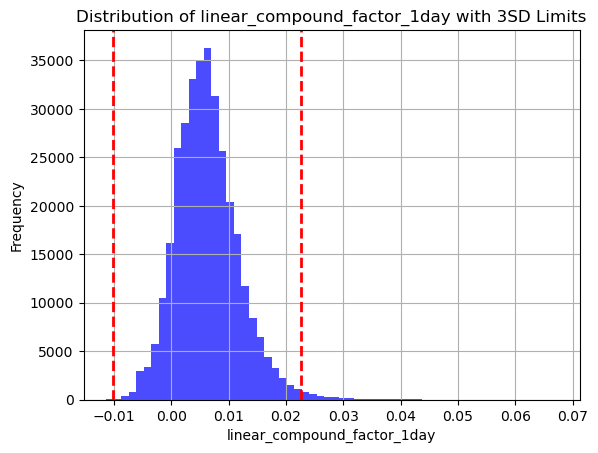

In [112]:
# 选择因子列
factor_data = input_df.select(FACTOR_NAME).fill_nan(0)

# 计算描述性统计信息
descriptive_stats = factor_data.describe().to_pandas()  # 使用to_pandas()仅用于美观的输出
print(descriptive_stats)

# 计算均值和标准差
stats = input_df.fill_nan(0).select([
    pl.col(FACTOR_NAME).mean().alias('mean'),
    pl.col(FACTOR_NAME).std().alias('std')
])

print (stats.to_numpy())

mean = stats.to_numpy()[0][0]
std = stats.to_numpy()[0][1]

# 计算3个标准差的范围
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# 统计超出3个标准差的值的数量
outliers = input_df.filter((pl.col(FACTOR_NAME) < lower_bound) | (pl.col(FACTOR_NAME) > upper_bound))
outlier_count = outliers.height

print(f'Values beyond 3 standard deviations: {outlier_count}')
print(f'Percentage of total: {(outlier_count / input_df.height * 100):.2f}%')

# 可视化这些极端值
plt.figure(figsize=(10, 6))
input_df.select(FACTOR_NAME).to_pandas().hist(bins=60, color='blue', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)
plt.title(f'Distribution of {FACTOR_NAME} with 3SD Limits')
plt.xlabel(FACTOR_NAME)
plt.ylabel('Frequency')
plt.show()



   lower_quantile  upper_quantile
0       -0.005139             NaN
shape: (9, 2)
┌────────────┬─────────────────────────────┐
│ statistic  ┆ linear_compound_factor_1day │
│ ---        ┆ ---                         │
│ str        ┆ f64                         │
╞════════════╪═════════════════════════════╡
│ count      ┆ 340016.0                    │
│ null_count ┆ 0.0                         │
│ mean       ┆ NaN                         │
│ std        ┆ NaN                         │
│ min        ┆ -0.005139                   │
│ 25%        ┆ 0.002625                    │
│ 50%        ┆ 0.005962                    │
│ 75%        ┆ 0.009569                    │
│ max        ┆ 0.067305                    │
└────────────┴─────────────────────────────┘


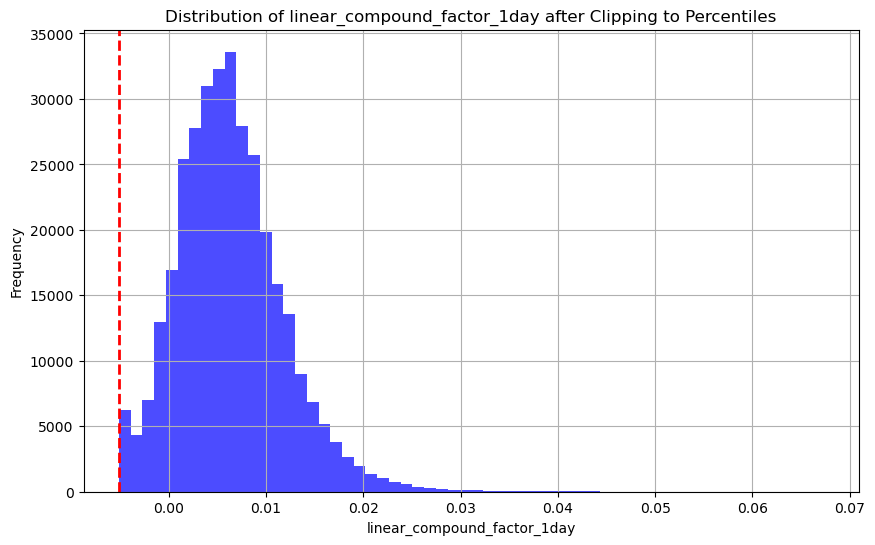

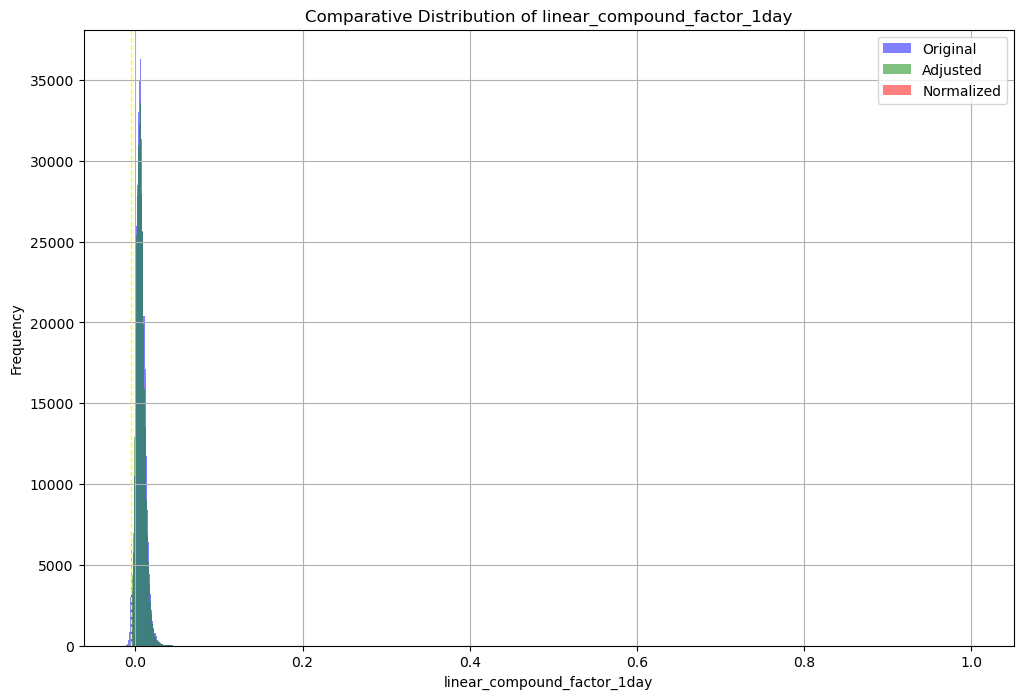

In [113]:
import polars as pl
import matplotlib.pyplot as plt

# Assuming FACTOR_NAME and input_df are already defined

upper_pct = 0.99
lower_pct = 1 - upper_pct

# Calculate quantiles
quantiles_df = input_df.select([
    pl.col(FACTOR_NAME).quantile(lower_pct).alias('lower_quantile'),
    pl.col(FACTOR_NAME).quantile(upper_pct).alias('upper_quantile')
]).to_pandas()

print (quantiles_df)

# Extract quantile values
lower_quantile = quantiles_df['lower_quantile'].iloc[0]
upper_quantile = quantiles_df['upper_quantile'].iloc[0]

# Replace values outside the quantile thresholds
result_hour_adjusted = input_df.with_columns(
    pl.when(pl.col(FACTOR_NAME) < lower_quantile)
    .then(lower_quantile)
    .when(pl.col(FACTOR_NAME) > upper_quantile)
    .then(upper_quantile)
    .otherwise(pl.col(FACTOR_NAME))
    .alias(FACTOR_NAME)
)

# Print the modified DataFrame's statistics
print(result_hour_adjusted.select(FACTOR_NAME).describe())

# Visualization of the modified distribution
plt.figure(figsize=(10, 6))
result_hour_adjusted[FACTOR_NAME].to_pandas().hist(bins=60, color='blue', alpha=0.7)
plt.axvline(lower_quantile, color='red', linestyle='dashed', linewidth=2)
plt.axvline(upper_quantile, color='red', linestyle='dashed', linewidth=2)
plt.title(f'Distribution of {FACTOR_NAME} after Clipping to Percentiles')
plt.xlabel(FACTOR_NAME)
plt.ylabel('Frequency')
plt.show()

# 正则化 result_hour_adjusted
mean_adjusted = result_hour_adjusted[FACTOR_NAME].mean()
std_adjusted = result_hour_adjusted[FACTOR_NAME].std()

result_hour_normalized = result_hour_adjusted.with_columns(
    ((pl.col(FACTOR_NAME) - mean_adjusted) / std_adjusted).alias(f"{FACTOR_NAME}_normalized")
)

# 将原始数据、调整后的数据和正则化后的数据转换为 pandas DataFrame
df_original = input_df[FACTOR_NAME].to_pandas()
df_adjusted = result_hour_adjusted[FACTOR_NAME].to_pandas()
df_normalized = result_hour_normalized[f"{FACTOR_NAME}_normalized"].to_pandas()

# 绘制三个数据集的分布图
plt.figure(figsize=(12, 8))
df_original.hist(bins=60, alpha=0.5, label='Original', color='blue')
df_adjusted.hist(bins=60, alpha=0.5, label='Adjusted', color='green')
df_normalized.hist(bins=60, alpha=0.5, label='Normalized', color='red')

# 添加图例和其它图形元素
plt.axvline(lower_quantile, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(upper_quantile, color='yellow', linestyle='dashed', linewidth=1)
plt.title(f'Comparative Distribution of {FACTOR_NAME}')
plt.xlabel(FACTOR_NAME)
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [114]:
normalized_column = result_hour_normalized.select(f"{FACTOR_NAME}_normalized")
normalized_column
input_df = input_df.with_columns(normalized_column)
if IF_NORM_FACTOR:
    FACTOR_NAME = f"{FACTOR_NAME}_normalized"
input_df

shape: (340_016, 67)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ open_time ┆ open      ┆ high      ┆ low       ┆ … ┆ linear_co ┆ linear_co ┆ linear_co ┆ linear_c │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ mpound_fa ┆ mpound_fa ┆ mpound_fa ┆ ompound_ │
│ datetime[ ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ctor_8day ┆ ctor_9day ┆ ctor_10da ┆ factor_1 │
│ ms]       ┆           ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ y         ┆ day_no…  │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2024-07-3 ┆ 0.026385  ┆ 0.026727  ┆ 0.026245  ┆ … ┆ 0.020157  ┆ 0.021695  ┆ 0.021479  ┆ NaN      │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.16992   ┆ 0.17143   ┆ 0.16811   ┆ … ┆ -0.003546 ┆ -0.002785 ┆ -0.002618 ┆ NaN      │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.0807    ┆ 0.08128   ┆ 0.08022   ┆ … ┆ 0.030688  ┆ 0.033222  ┆ 0.033984  ┆ NaN      │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.0114478 ┆ 0.0115573 ┆ 0.0113534 ┆ … ┆ 0.020688  ┆ 0.022176  ┆ 0.021831  ┆ NaN      │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.13646   ┆ 0.13674   ┆ 0.13343   ┆ … ┆ 0.011807  ┆ 0.010685  ┆ 0.010096  ┆ NaN      │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2024-09-2 ┆ 0.6563    ┆ 0.6616    ┆ 0.6445    ┆ … ┆ 0.003544  ┆ 0.004498  ┆ 0.004073  ┆ NaN      │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.01492   ┆ 0.01499   ┆ 0.01489   ┆ … ┆ 0.025085  ┆ 0.027127  ┆ 0.03025   ┆ NaN      │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.12208   ┆ 0.12243   ┆ 0.12187   ┆ … ┆ 0.012466  ┆ 0.01324   ┆ 0.014045  ┆ NaN      │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 4.2131    ┆ 4.249     ┆ 4.2112    ┆ … ┆ -0.030199 ┆ -0.032868 ┆ -0.033208 ┆ NaN      │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.3277    ┆ 0.3281    ┆ 0.3268    ┆ … ┆ 0.022118  ┆ 0.025554  ┆ 0.030464  ┆ NaN      │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───

In [115]:
# 因子未来收益率：
ret = close.clone()
ret[columns] = ret[columns].shift(-1) / ret[columns] - 1

# 对齐column
ret = ret[factors.columns] 
t = factors[["open_time"]] 

# 对齐open_time
ret = ret.join(t, how="inner", on=["open_time"]).sort(by=["open_time"]) 
factors = factors.sort(by=["open_time"])

factors
ret

shape: (1_264, 270)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ open_time ┆ 1000BONKU ┆ 1000FLOKI ┆ 1000LUNCU ┆ … ┆ ZILUSDT   ┆ ZKUSDT    ┆ ZROUSDT   ┆ ZRXUSDT  │
│ ---       ┆ SDT       ┆ USDT      ┆ SDT       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ datetime[ ┆ ---       ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
│ ms]       ┆ f64       ┆ f64       ┆ f64       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 2024-07-3 ┆ 0.010597  ┆ 0.011668  ┆ 0.005094  ┆ … ┆ 0.000595  ┆ 0.008386  ┆ 0.008564  ┆ 0.012094 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 16:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ -0.004322 ┆ 0.005328  ┆ 0.003956  ┆ … ┆ 0.002974  ┆ 0.00792   ┆ -0.003701 ┆ 0.01248  │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 17:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ -0.04356  ┆ -0.032145 ┆ -0.021054 ┆ … ┆ -0.018387 ┆ -0.026848 ┆ -0.028191 ┆ -0.02596 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 4        │
│ 18:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ -0.014445 ┆ -0.020036 ┆ -0.021758 ┆ … ┆ -0.013897 ┆ -0.013862 ┆ -0.00787  ┆ -0.00780 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 8        │
│ 19:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-07-3 ┆ 0.00036   ┆ 0.003561  ┆ 0.013628  ┆ … ┆ 0.006127  ┆ 0.008052  ┆ 0.009746  ┆ 0.002171 │
│ 1         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 20:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ 2024-09-2 ┆ -0.001555 ┆ 0.000149  ┆ 0.002711  ┆ … ┆ 0.0       ┆ -0.002744 ┆ -0.001836 ┆ -0.00030 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 2        │
│ 03:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ -0.007842 ┆ -0.00448  ┆ -0.008463 ┆ … ┆ -0.011928 ┆ -0.01133  ┆ -0.008819 ┆ -0.00605 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 1        │
│ 04:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.001345  ┆ -0.001875 ┆ -0.005808 ┆ … ┆ 0.0       ┆ -0.000737 ┆ 0.002308  ┆ -0.00243 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 5        │
│ 05:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ 0.005262  ┆ 0.003231  ┆ 0.004173  ┆ … ┆ 0.004695  ┆ 0.002212  ┆ 0.004771  ┆ 0.001221 │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 06:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 2024-09-2 ┆ NaN       ┆ NaN       ┆ NaN       ┆ … ┆ NaN       ┆ NaN       ┆ NaN       ┆ NaN      │
│ 2         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 07:00:00  ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

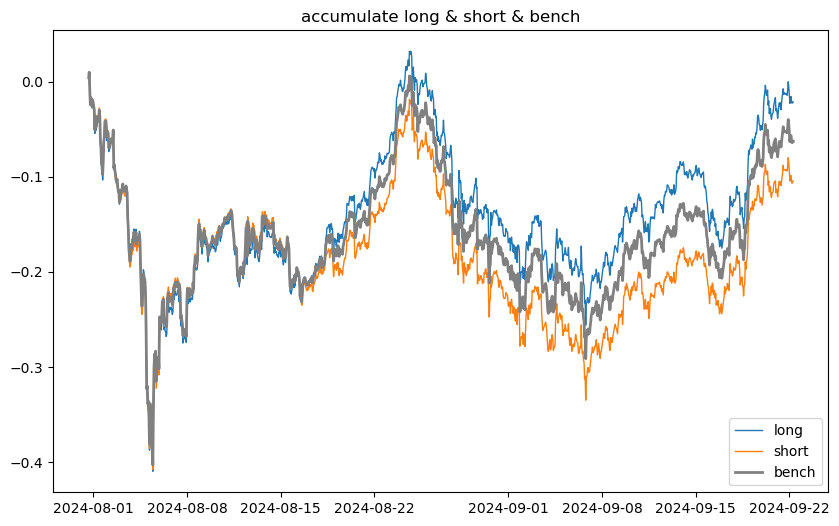

long: 
ann_return = -0.0062  sharpe = -0.0377  maxdd = 0.4151  calmar_ratio = -0.015  

short: 
ann_return = -0.0302  sharpe = -0.1878  maxdd = 0.4133  calmar_ratio = -0.0732  

bench: 
ann_return = -0.0181  sharpe = -0.113  maxdd = 0.4085  calmar_ratio = -0.0443  



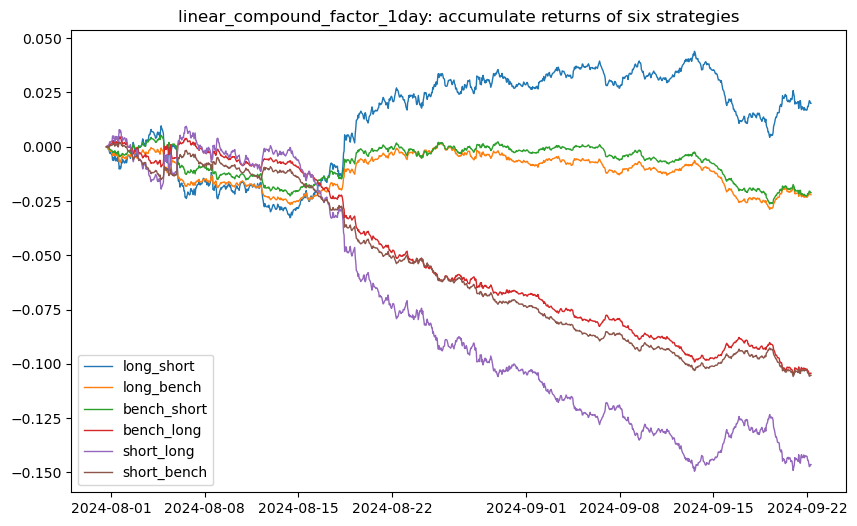

long_short: 
ann_return = 0.0058  sharpe = 0.2534  maxdd = 0.0419  calmar_ratio = 0.1376  

long_bench: 
ann_return = -0.0064  sharpe = -0.5315  maxdd = 0.0306  calmar_ratio = -0.2085  

bench_short: 
ann_return = -0.0061  sharpe = -0.5425  maxdd = 0.0314  calmar_ratio = -0.1941  

bench_long: 
ann_return = -0.0301  sharpe = -2.5097  maxdd = 0.1089  calmar_ratio = -0.2766  

short_long: 
ann_return = -0.0423  sharpe = -1.8574  maxdd = 0.1574  calmar_ratio = -0.2685  

short_bench: 
ann_return = -0.0304  sharpe = -2.7019  maxdd = 0.1077  calmar_ratio = -0.2822  



In [116]:
factors_np = factors[columns].to_numpy()
ret_np = ret[columns].to_numpy()

def factor_stats(n, pnl:pl.Series):
    net_value = pnl.cum_sum() + 1.0
    sharpe = n ** 0.5 * pnl.mean() / pnl.std()
    ann_return = n * pnl.mean()
    maxdd = (-(net_value / net_value.cum_max() - 1)).max()
    calmar_ratio = ann_return / maxdd

    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')


# 求每一行的分位数
percentage = 0.5
quantiles = np.nanquantile(factors_np, [1 - percentage, percentage], axis=1)

# 把quantiles[0]和[1]变成factors_np的shape
f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)
long_quantile, short_quantile = f(0), f(1)

# print (f'quantiles: {quantiles} .  long_quantile: {long_quantile}, short_quantile: {short_quantile}')

# return before fee
long = np.nan_to_num(np.nan_to_num(ret_np * (factors_np > long_quantile), 0.0).sum(axis=1) / (factors_np > long_quantile).sum(axis=1) , 0.0)
short = np.nan_to_num(np.nan_to_num(ret_np * (factors_np < long_quantile), 0.0).sum(axis=1) / (factors_np < long_quantile).sum(axis=1) , 0.0)
bench = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)

# return after fee
long_fee = pl.Series(long - 2 * commission)
short_fee = pl.Series(short - 2 * commission)
bench_fee = pl.Series(bench - 2 * commission)

long_short = pl.Series(long - short - 2 * commission)
long_bench = pl.Series(long - bench - 2 * commission)
bench_short = pl.Series(bench - short - 2 * commission)
bench_long = pl.Series(bench - long - 2 * commission)
short_long = pl.Series(short - long - 2 * commission)
short_bench = pl.Series(short - bench - 2 * commission)

long_cum = long_fee.cum_sum()
short_cum = short_fee.cum_sum()
bench_cum = bench_fee.cum_sum()

long_short_cum = long_short.cum_sum()
long_bench_cum = long_bench.cum_sum()
bench_short_cum = bench_short.cum_sum()
bench_long_cum = bench_long.cum_sum()
short_long_cum = short_long.cum_sum()
short_bench_cum = short_bench.cum_sum()

plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_cum.to_pandas(), label='long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_cum.to_pandas(), label='short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_cum.to_pandas(), label='bench', linewidth=2, color="gray")
plt.title("accumulate long & short & bench")
plt.legend()
plt.show()

# print (long_cum.shape, short_cum.shape, bench_cum.shape)
# print (long_cum, short_cum, bench_cum)
# print (f'factor dim: {factors.shape}, ret dim: {ret.shape}')
# print (factors)
# print (factors["open_time"].to_pandas())

# 因子评价指标
n = 365
print("long: ")
factor_stats(n, long_fee)
print("\n")
print("short: ")
factor_stats(n, short_fee)
print("\n")
print("bench: ")
factor_stats(n, bench_fee)
print("\n")


plt.figure(figsize=(10, 6))
plt.plot(factors["open_time"].to_pandas(), long_short_cum.to_pandas(), label='long_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), long_bench_cum.to_pandas(), label='long_bench', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_short_cum.to_pandas(), label='bench_short', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), bench_long_cum.to_pandas(), label='bench_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(), short_long_cum.to_pandas(), label='short_long', linewidth=1)
plt.plot(factors["open_time"].to_pandas(),short_bench_cum.to_pandas(), label='short_bench', linewidth=1)
plt.title(f"{FACTOR_NAME}: accumulate returns of six strategies")
plt.legend()
plt.show()


# 因子评价指标
print("long_short: ")
factor_stats(n, long_short)
print("\n")

print("long_bench: ")
factor_stats(n, long_bench)
print("\n")

print("bench_short: ")
factor_stats(n, bench_short)
print("\n")

print("bench_long: ")
factor_stats(n, bench_long)
print("\n")

print("short_long: ")
factor_stats(n, short_long)
print("\n")

print("short_bench: ")
factor_stats(n, short_bench)
print("\n")

###################################################################################################################


## 分组return

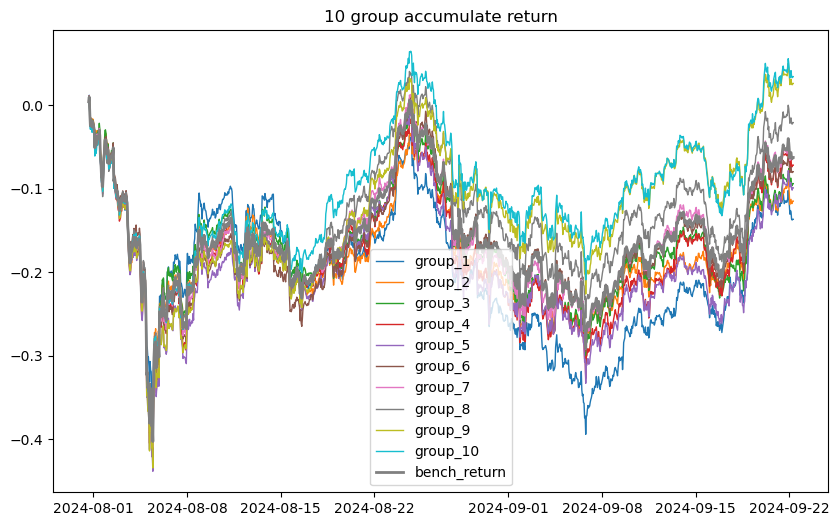

group_1: 
ann_return = -0.0395  sharpe = -0.2753  maxdd = 0.4012  calmar_ratio = -0.0984  

group_2: 
ann_return = -0.0332  sharpe = -0.2054  maxdd = 0.419  calmar_ratio = -0.0792  

group_3: 
ann_return = -0.0271  sharpe = -0.16  maxdd = 0.414  calmar_ratio = -0.0655  

group_4: 
ann_return = -0.0207  sharpe = -0.1197  maxdd = 0.4331  calmar_ratio = -0.0479  

group_5: 
ann_return = -0.0286  sharpe = -0.1662  maxdd = 0.4435  calmar_ratio = -0.0645  

group_6: 
ann_return = -0.023  sharpe = -0.1349  maxdd = 0.4147  calmar_ratio = -0.0555  

group_7: 
ann_return = -0.0184  sharpe = -0.1096  maxdd = 0.416  calmar_ratio = -0.0442  

group_8: 
ann_return = -0.006  sharpe = -0.0367  maxdd = 0.4064  calmar_ratio = -0.0149  

group_9: 
ann_return = 0.0075  sharpe = 0.0453  maxdd = 0.4403  calmar_ratio = 0.017  

group_10: 
ann_return = 0.0099  sharpe = 0.061  maxdd = 0.4027  calmar_ratio = 0.0245  



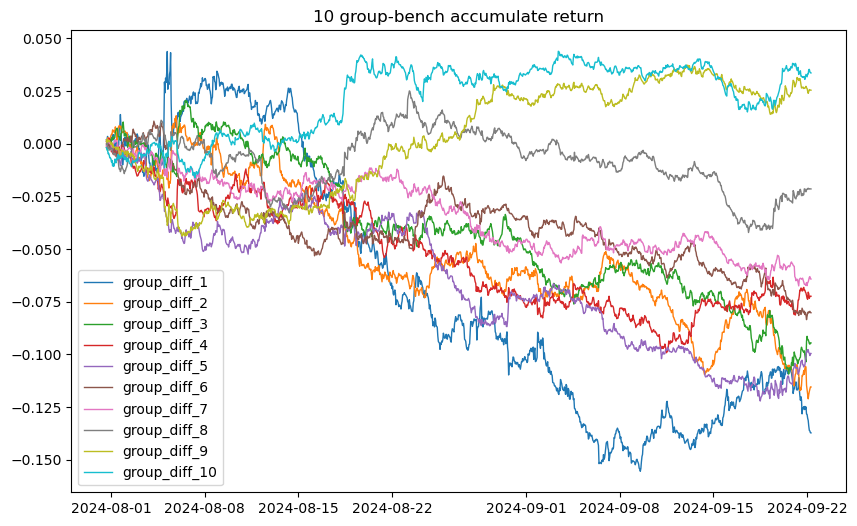

group_diff_1: 
ann_return = -0.0396  sharpe = -0.8202  maxdd = 0.1908  calmar_ratio = -0.2077  

group_diff_2: 
ann_return = -0.0333  sharpe = -1.002  maxdd = 0.1326  calmar_ratio = -0.2515  

group_diff_3: 
ann_return = -0.0273  sharpe = -0.9181  maxdd = 0.1272  calmar_ratio = -0.2146  

group_diff_4: 
ann_return = -0.0209  sharpe = -0.7136  maxdd = 0.1015  calmar_ratio = -0.2059  

group_diff_5: 
ann_return = -0.0287  sharpe = -1.0761  maxdd = 0.1219  calmar_ratio = -0.2359  

group_diff_6: 
ann_return = -0.0232  sharpe = -0.8984  maxdd = 0.0932  calmar_ratio = -0.2486  

group_diff_7: 
ann_return = -0.0185  sharpe = -0.8183  maxdd = 0.0694  calmar_ratio = -0.2673  

group_diff_8: 
ann_return = -0.0062  sharpe = -0.2688  maxdd = 0.0656  calmar_ratio = -0.0946  

group_diff_9: 
ann_return = 0.0073  sharpe = 0.338  maxdd = 0.0458  calmar_ratio = 0.16  

group_diff_10: 
ann_return = 0.0097  sharpe = 0.4518  maxdd = 0.0276  calmar_ratio = 0.3514  

long_group_index_list: [10], short_grou

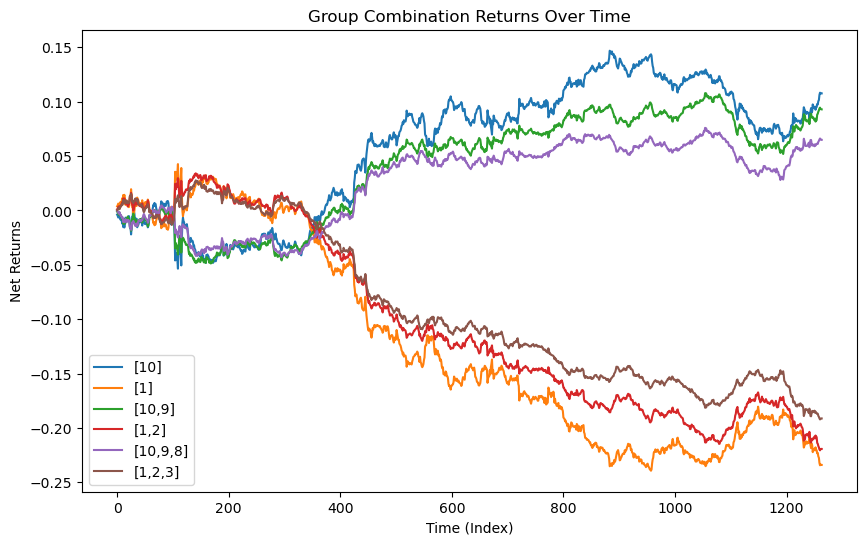

In [117]:
GROUP_NUM = 10

quantiles = np.nanquantile(factors_np, np.linspace(0, 1, GROUP_NUM + 1), axis=1)
total_count = np.count_nonzero(~np.isnan(factors_np), axis=1)
f = lambda x: quantiles[x][:, None].repeat(factors_np.shape[1], axis=-1)

#bench_return = np.nan_to_num(ret_np, 0.0).mean(axis=1)
bench_return = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0)
bench_return_fee = np.nan_to_num(np.nanmean(ret_np, axis=1), 0.0) - 2 * commission
group_return = np.zeros((factors_np.shape[0], GROUP_NUM))
group_diff_return = np.zeros((factors_np.shape[0], GROUP_NUM))


for i in range(1, GROUP_NUM + 1):
    # 计算在当前分位数范围内的总收益。如果因子值位于该分位数的范围内，则相应的收益被计入总和。
    ret_sum = np.nan_to_num(ret_np * (f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    # 计算当前分位数范围内的有效数据点数
    ret_count = np.nan_to_num((f(i-1) <= factors_np) * (factors_np <= f(i)), 0.0).sum(axis=1)
    group_return[:, i-1] = ret_sum / ret_count - 2 * commission 
    group_diff_return[:, i-1] = ret_sum / ret_count - bench_return - 2 * commission


group_return = np.nan_to_num(group_return)
group_diff_return = np.nan_to_num(group_diff_return)


plt.figure(figsize=(10, 6))
plt.title(f"{GROUP_NUM} group accumulate return")
for i in range(GROUP_NUM):
    plt.plot(factors["open_time"].to_pandas(), np.cumsum(group_return[:, i]), label=f"group_{i+1}", linewidth=1)
plt.plot(factors["open_time"].to_pandas(), np.cumsum(bench_return_fee), label=f"bench_return", linewidth=2, color="gray")
plt.legend()
plt.show()

for i in range(GROUP_NUM):
    print(f"group_{i+1}: ")
    net_value = np.cumsum(group_return[:, i]) + 1.0
    sharpe = n ** 0.5 * group_return[:, i].mean() / group_return[:, i].std()
    ann_return = n * group_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")


plt.figure(figsize=(10, 6))
plt.title(f"{GROUP_NUM} group-bench accumulate return")
for i in range(GROUP_NUM):
    plt.plot(factors["open_time"].to_pandas(), np.cumsum(group_diff_return[:, i]), label=f"group_diff_{i+1}", linewidth=1)
plt.legend()
plt.show()

for i in range(GROUP_NUM):
    print(f"group_diff_{i+1}: ")
    net_value = np.cumsum(group_diff_return[:, i]) + 1.0
    sharpe = n ** 0.5 * group_diff_return[:, i].mean() / group_diff_return[:, i].std()
    ann_return = n * group_diff_return[:, i].mean()
    maxdd = (-(net_value / np.maximum.accumulate(net_value) - 1)).max()
    calmar_ratio = ann_return / maxdd
    print("ann_return =", round(ann_return, 4), end='  ')
    print("sharpe =", round(sharpe, 4), end='  ')
    print("maxdd =", round(maxdd, 4), end='  ')
    print("calmar_ratio =", round(calmar_ratio, 4), end='  ')
    print("\n")

###################################################################################################################
def GetGroupCombinationReturn (input_factors_np: np.ndarray, input_ret_np: np.ndarray, group_index_list: list)-> np.ndarray:
    total_ret_sum = np.zeros(input_factors_np.shape[0])
    total_ret_count = np.zeros(input_factors_np.shape[0])
    
    # Loop through each group index in the list
    for i in group_index_list:
        assert i >= 1 and i <= GROUP_NUM, f"Group index {i} is out of range"
        # Compute the mask for the current group
        group_mask = (f(i-1) <= input_factors_np) & (input_factors_np <= f(i))
        
        # Calculate the return sum for the current group
        ret_sum = np.nan_to_num(input_ret_np * group_mask, nan=0.0).sum(axis=1)
        total_ret_sum += ret_sum
        
        # Calculate the count of returns for the current group
        ret_count = np.nan_to_num(group_mask, nan=0.0).sum(axis=1)
        total_ret_count += ret_count
    
    # Compute the average return per count, adjust for commission
    return  total_ret_sum / total_ret_count - 2 * commission
    

GROUP_COMBINATION_LIST = [[20], [19], [18], [20, 19], [20, 19, 18], [1], [2], [3], [1, 2], [1, 2, 3]]  # start from 1
GROUP_COMBINATION_LIST = [[10], [1], [10, 9], [1, 2], [10, 9, 8], [1, 2, 3]] # start from 1, group num = 10
group_combination_result = [[] for _ in range(len(GROUP_COMBINATION_LIST))]

tmp = []

for long_group_index_list in GROUP_COMBINATION_LIST:
    short_group_index_list = [(GROUP_NUM + 1 - i) for i in long_group_index_list]
    long_return = GetGroupCombinationReturn(factors_np, ret_np, long_group_index_list)
    short_return = GetGroupCombinationReturn(factors_np, ret_np, short_group_index_list)
    cur_return = long_return - short_return - 2 * commission
    tmp.append (cur_return)
    print (f'long_group_index_list: {long_group_index_list}, short_group_index_list: {short_group_index_list}', end = ' === ')
    factor_stats (n, pl.Series(np.nan_to_num(cur_return, 0.0)))
    print (' ')
    

plt.figure(figsize=(10, 6))  # Optional: Specifies the figure size

for idx, returns in enumerate(tmp):
    cumulative_returns = np.cumsum(np.nan_to_num (returns, 0))  # Calculate cumulative returns
    # plt.plot(cumulative_returns, label=f'Group Combination {idx + 1}')  # Plot cumulative returns
    idx_str = ','.join([str(i) for i in GROUP_COMBINATION_LIST[idx]])
    plt.plot(cumulative_returns, label = '[' + idx_str + ']')  # Plot cumulative returns


# Adding labels and title for clarity
plt.title('Group Combination Returns Over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Net Returns')
plt.legend()  

In [118]:
def plot_array(title: str, array: np.ndarray, cumulative: bool):
    """
    Plot either the original array or its cumulative sum based on a boolean flag.

    Args:
    title (str): Title of the plot.
    array (numpy.ndarray): NumPy array to be plotted.
    cumulative (bool): If True, plot the cumulative sum of the array. If False, plot the original array.
    """
    if cumulative:
        # Calculate the cumulative sum of the array if the flag is True
        array_to_plot = np.cumsum(np.nan_to_num(array, nan=0.0))
        ylabel = 'Cumulative Sum'
    else:
        # Use the original array if the flag is False
        array_to_plot = array
        ylabel = 'Values'
    
    # Create the plot
    # plt.figure(figsize=(10, 6))
    plt.figure(figsize=(5, 3))
    plt.plot(array_to_plot, marker='o', linestyle='-', color='blue', linewidth = 1, markersize = 1)
    # plt.title(title + ' cumulative' if cumulative else '')
    if cumulative:
        plt.title(title + ' (cumulative)')
    else:
        plt.title(title)
    plt.xlabel('Index')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

## IC 分析（因子值与return）

In [119]:
def print_statistics(ic_array: np.ndarray, description):
    valid_ic = ic_array[~np.isnan(ic_array)]  # Filter out NaN values for statistics
    mean_ic = np.mean(valid_ic)
    median_ic = np.median(valid_ic)
    std_ic = np.std(valid_ic)
    significant_count = np.sum(np.abs(valid_ic) > 0.1)  # Count ICs significantly different from 0
    significant_proportion = significant_count / len(valid_ic) if len(valid_ic) > 0 else 0

    print(f"{description} Statistics:")
    print(f"Mean IC: {mean_ic:.3f}")
    print(f"Median IC: {median_ic:.3f}")
    print(f"Standard Deviation: {std_ic:.3f}")
    print(f"Count of Significant ICs (|IC| > 0.1): {significant_count}")
    print(f"Proportion of Significant ICs: {significant_proportion:.2%}\n")

In [120]:
def calculate_statistics(ic_array: np.ndarray):
    valid_ic = ic_array[~np.isnan(ic_array)]  # Filter out NaN values for statistics
    
    if len(valid_ic) == 0:
        return {}  # Return empty dictionary if no valid ICs

    mean_ic = np.mean(valid_ic)
    median_ic = np.median(valid_ic)
    std_ic = np.std(valid_ic)
    significant_count = np.sum(np.abs(valid_ic) > 0.1)  # Count ICs significantly different from 0
    significant_proportion = significant_count / len(valid_ic)
    
    # Calculate Information Ratio (IR)
    ir = mean_ic / std_ic if std_ic != 0 else float('inf')
    
    # Calculate Skewness and Kurtosis
    skewness = stats.skew(valid_ic)
    kurtosis = stats.kurtosis(valid_ic)

    # Perform t-test against the null hypothesis that mean = 0
    t_statistic, p_value = stats.ttest_1samp(valid_ic, 0)

    # Compile results into a dictionary
    results = {
        'Mean IC': mean_ic,
        'Median IC': median_ic,
        'Standard Deviation': std_ic,
        'Count of Significant ICs (|IC| > 0.1)': significant_count,
        'Proportion of Significant ICs': significant_proportion,
        'Information Ratio (IR)': ir,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'T-Value': t_statistic,
        'P-Value': p_value
    }
    
    return results

In [121]:
import numpy as np
from scipy import stats

def calculate_statistics(ic_array: np.ndarray):
    valid_ic = ic_array[~np.isnan(ic_array)]  # Filter out NaN values for statistics
    
    if len(valid_ic) == 0:
        return {}  # Return empty dictionary if no valid ICs

    mean_ic = round(np.mean(valid_ic), 4)
    median_ic = round(np.median(valid_ic), 4)
    std_ic = round(np.std(valid_ic), 4)
    significant_count = np.sum(np.abs(valid_ic) > 0.1)  # Count ICs significantly different from 0
    significant_proportion = round(significant_count / len(valid_ic), 4)
    
    # Calculate Information Ratio (IR)
    ir = round(mean_ic / std_ic, 4) if std_ic != 0 else float('inf')
    
    # Calculate Skewness and Kurtosis
    skewness = round(stats.skew(valid_ic), 4)
    kurtosis = round(stats.kurtosis(valid_ic), 4)

    # Perform t-test against the null hypothesis that mean = 0
    t_statistic, p_value = stats.ttest_1samp(valid_ic, 0)
    t_statistic = round(t_statistic, 4)
    p_value = round(p_value, 4)

    # Compile results into a dictionary
    results = {
        'Mean IC': mean_ic,
        'Median IC': median_ic,
        'Standard Deviation': std_ic,
        'Count of Significant ICs (|IC| > 0.1)': significant_count,
        'Proportion of Significant ICs': significant_proportion,
        'Information Ratio (IR)': ir,
        'Skewness': skewness,
        'Kurtosis': kurtosis,
        'T-Value': t_statistic,
        'P-Value': p_value
    }
    
    return results


ic stat dict {'Mean IC': 0.018, 'Median IC': 0.0162, 'Standard Deviation': 0.0661, 'Count of Significant ICs (|IC| > 0.1)': 187, 'Proportion of Significant ICs': 0.1481, 'Information Ratio (IR)': 0.2723, 'Skewness': 0.028, 'Kurtosis': 0.0505, 'T-Value': 9.6632, 'P-Value': 0.0}


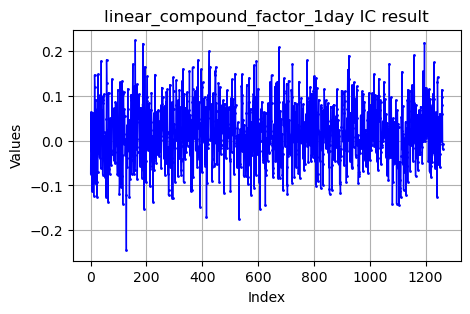

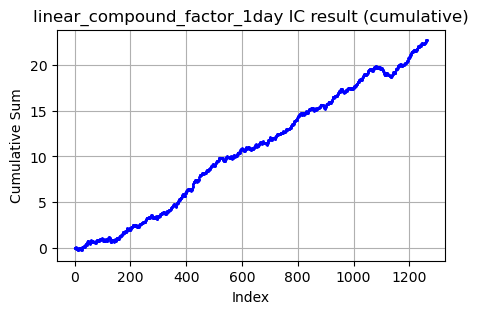

rank ic stat dict {'Mean IC': 0.018, 'Median IC': 0.0162, 'Standard Deviation': 0.0661, 'Count of Significant ICs (|IC| > 0.1)': 187, 'Proportion of Significant ICs': 0.1479, 'Information Ratio (IR)': 0.2723, 'Skewness': 0.0286, 'Kurtosis': 0.0526, 'T-Value': 9.6629, 'P-Value': 0.0}


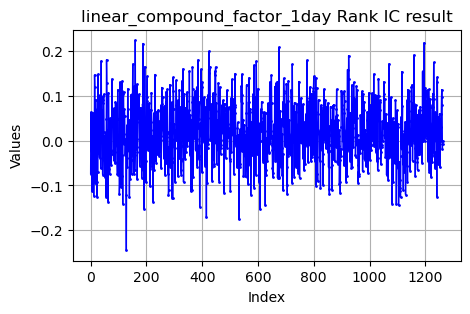

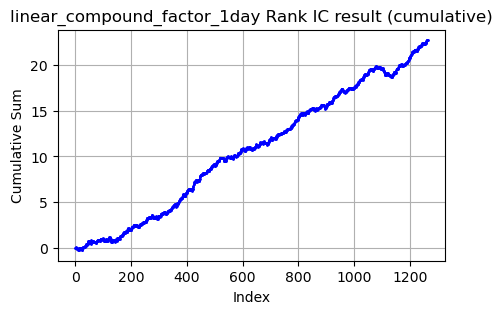

In [122]:
import numpy as np
from scipy.stats import kendalltau, rankdata, spearmanr
from scipy import stats

USE_PEARSOM = 0
USE_SPEARMAN = 0

num_timestamps = factors_np.shape[0]
num_stocks = factors_np.shape[1]

# Initialize an array to store the IC values
ic_values = np.zeros(num_timestamps)
rank_ic_values = np.zeros(num_timestamps)

for i in range(num_timestamps):
    # Extract the factor values and return values for the current timestamp
    factor_values = factors_np[i, :]
    returns = ret_np[i, :]

    # Find indices where both factor_values and returns are not NaN
    valid_indices = ~(np.isnan(factor_values) | np.isnan(returns))

    # Filter out NaN values
    factor_values_valid = factor_values[valid_indices]
    returns_valid = returns[valid_indices]

    # Rank the valid arrays
    ranked_factors = rankdata(factor_values_valid)
    ranked_returns = rankdata(returns_valid)

    # Calculate the Pearson correlation coefficient (IC)
    if len(factor_values_valid) > 1:
        if USE_PEARSOM:
            ic_values[i] = np.corrcoef(factor_values_valid, returns_valid)[0, 1]
            rank_ic_values[i] = np.corrcoef(ranked_factors, ranked_returns)[0, 1]
        elif USE_SPEARMAN:
            ic_values[i] = spearmanr(factor_values_valid, returns_valid).correlation
            rank_ic_values[i] = spearmanr(ranked_factors, ranked_returns).correlation
        else:
            tau, _ = kendalltau(factor_values_valid, returns_valid)
            rank_tau, _ = kendalltau(ranked_factors, ranked_returns)
            # print (f'tau: {tau} == factor_values: {factor_values_valid} == returns: {returns_valid}')
            ic_values[i] = tau
            rank_ic_values[i] = rank_tau
    else:
        ic_values[i] = np.nan

# print_statistics(ic_values, "IC")
ic_stat: dict = calculate_statistics (ic_values)
print ('ic stat dict', ic_stat)
plot_array(f"{FACTOR_NAME} IC result", ic_values, cumulative = False)
plot_array(f"{FACTOR_NAME} IC result", ic_values, cumulative = True)

# print_statistics(rank_ic_values, "Rank IC")
rank_ic_stat: dict = calculate_statistics (rank_ic_values)
print ('rank ic stat dict', rank_ic_stat)
plot_array(f"{FACTOR_NAME} Rank IC result", rank_ic_values, cumulative = False)
plot_array(f"{FACTOR_NAME} Rank IC result", rank_ic_values, cumulative = True)


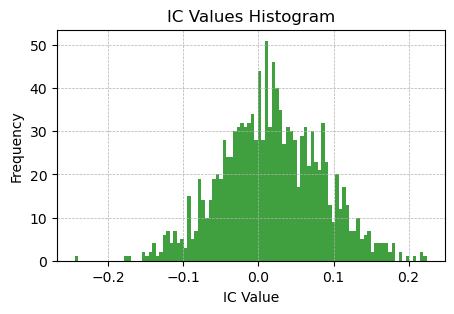

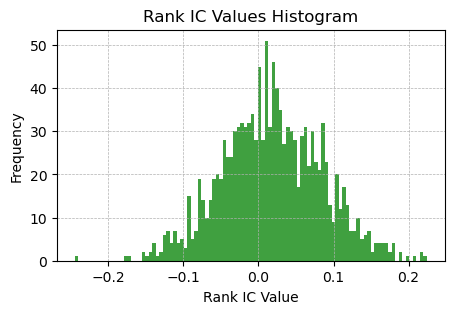

In [123]:
def plot_histogram(data, title='Histogram', xlabel='Value', ylabel='Frequency', bins=20, color='blue'):
    """
    Plots a histogram for the given data array.
    
    Parameters:
        data (array-like): The data array for which the histogram will be plotted.
        title (str): The title of the histogram plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        bins (int): The number of bins in the histogram.
        color (str): The color of the histogram bars.
    """
    # Filter out NaN values for accurate plotting
    valid_data = data[~np.isnan(data)]
    
    # Create the histogram
    # plt.figure(figsize=(10, 6))
    plt.figure(figsize=(5, 3))
    plt.hist(valid_data, bins=bins, color=color, alpha=0.75)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()
plot_histogram(ic_values, title='IC Values Histogram', xlabel='IC Value', ylabel='Frequency', bins=100, color='green')
plot_histogram(rank_ic_values, title='Rank IC Values Histogram', xlabel='Rank IC Value', ylabel='Frequency', bins=100, color='green')

## Group IC

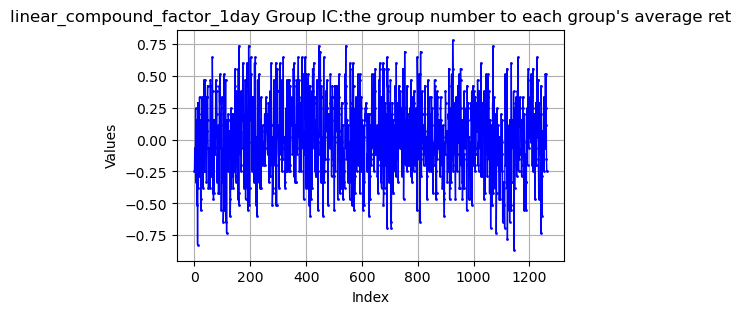

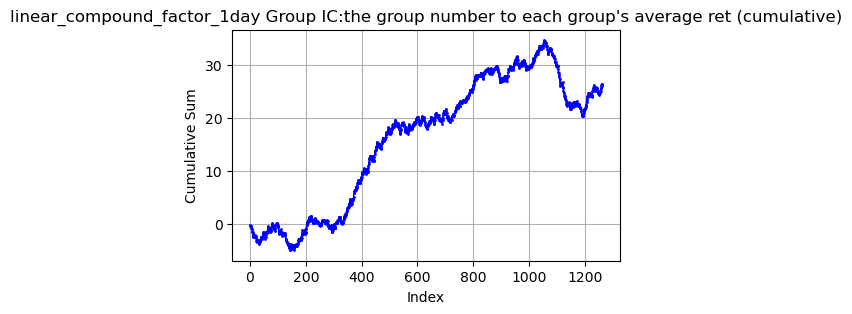

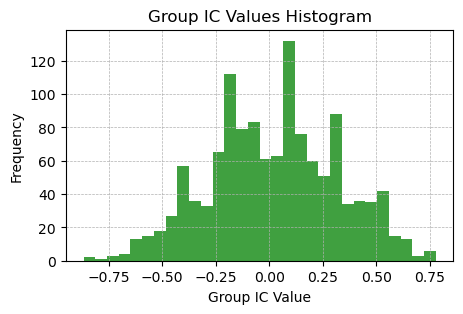

{'Mean IC': 0.0206,
 'Median IC': 0.0222,
 'Standard Deviation': 0.2991,
 'Count of Significant ICs (|IC| > 0.1)': 988,
 'Proportion of Significant ICs': 0.7823,
 'Information Ratio (IR)': 0.0689,
 'Skewness': -0.0186,
 'Kurtosis': -0.4322,
 'T-Value': 2.4515,
 'P-Value': 0.0144}

In [124]:
import numpy as np
from scipy.stats import kendalltau

group_ic_results = []

# Iterate over each time slice
for i in range(factors_np.shape[0]):
    factor_values = factors_np[i, :]
    returns = ret_np[i, :]

    # Filter out NaNs
    valid_mask = ~np.isnan(factor_values) & ~np.isnan(returns)
    valid_factors = factor_values[valid_mask]
    valid_returns = returns[valid_mask]

    # Check if there are enough non-NaN data points
    if len(valid_factors) >= GROUP_NUM:
        # Sort indices based on factor values
        sorted_indices = np.argsort(valid_factors)
        sorted_returns = valid_returns[sorted_indices]

        # Divide into groups
        group_edges = np.linspace(0, len(sorted_indices), GROUP_NUM + 1, dtype=int)
        group_returns = []

        for j in range(GROUP_NUM):
            # Indices for j-th group
            start_idx = group_edges[j]
            end_idx = group_edges[j + 1]

            # Calculate average return for the group
            group_average_return = np.nanmean(sorted_returns[start_idx:end_idx])
            group_returns.append(group_average_return)

        # Calculate IC between group indices and group average returns
        group_indices = np.arange(1, GROUP_NUM + 1)
        tau, _ = kendalltau(group_indices, group_returns)
        group_ic_results.append(tau)

group_ic_results_np = np.array(group_ic_results)

# print_statistics(group_ic_results_np, "Group IC")
group_ic_stat = calculate_statistics(group_ic_results_np)
plot_array(f"{FACTOR_NAME} Group IC:the group number to each group's average ret", group_ic_results_np, cumulative = False)
plot_array(f"{FACTOR_NAME} Group IC:the group number to each group's average ret", group_ic_results_np, cumulative = True)

plot_histogram(group_ic_results_np, title='Group IC Values Histogram', xlabel='Group IC Value', ylabel='Frequency', bins=30, color='green')
group_ic_stat 

### 汇总 IC, rank IC, group IC结果

In [125]:
def AnalyseICArray (ic_array: np.ndarray, type: str = 'IC'):
    """
    Analyze the IC array by calculating various statistics and plotting histograms.

    Args:
    ic_array (numpy.ndarray): The array of IC values to be analyzed.
    type (str): The type of IC values being analyzed. Can be 'IC', 'Rank IC', or 'Group IC'.
    """
    # Filter out NaN values for accurate statistics
    valid_ic = ic_array[~np.isnan(ic_array)]
    
    # Calculate the mean, median, and standard deviation of the IC values
    mean_ic = np.mean(valid_ic)
    median_ic = np.median(valid_ic)
    std_ic = np.std(valid_ic)
    
    # Count the number of IC values significantly different from 0
    significant_count = np.sum(np.abs(valid_ic) > 0.1)
    
    # Calculate the proportion of significant IC values
    significant_proportion = significant_count / len(valid_ic) if len(valid_ic) > 0 else 0
    
    # Print the statistics
    print(f"{type} Statistics:")
    print(f"Mean {type}: {mean_ic:.3f}")
    print(f"Median {type}: {median_ic:.3f}")
    print(f"Standard Deviation: {std_ic:.3f}")
    print(f"Count of Significant {type}s (|{type}| > 0.1): {significant_count}")
    print(f"Proportion of Significant {type}s: {significant_proportion:.2%}\n")
    

ic_values, rank_ic_values, group_ic_results
AnalyseICArray (ic_values, 'IC')


IC Statistics:
Mean IC: 0.018
Median IC: 0.016
Standard Deviation: 0.066
Count of Significant ICs (|IC| > 0.1): 187
Proportion of Significant ICs: 14.81%



## R方分析

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.385
Date:                Tue, 19 Nov 2024   Prob (F-statistic):              0.124
Time:                        01:08:16   Log-Likelihood:                 994.37
No. Observations:                 265   AIC:                            -1985.
Df Residuals:                     263   BIC:                            -1978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      9.409      0.0

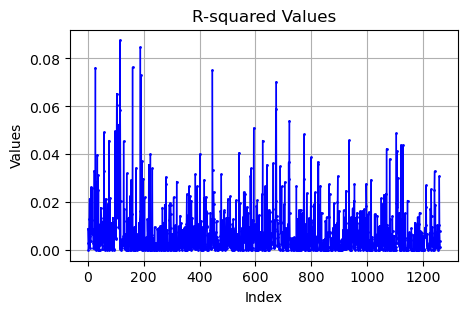

In [126]:
import numpy as np
import statsmodels.api as sm

r_squared_values = []  # Assuming you've initialized this list outside the loop

for i in range(factors_np.shape[0]):
    # 提取第i行作为X（因子值）和y（回报率）
    X = factors_np[i, :]
    y = ret_np[i, :]

    # 仅保留X和y中均非NaN的数据点
    valid_mask = ~np.isnan(X) & ~np.isnan(y)  # Create a mask to filter valid entries
    X_valid = X[valid_mask]
    y_valid = y[valid_mask]

    if len(X_valid) > 0:  # Ensure there is at least one valid data point to fit the model
        # 为X添加常数项
        X_valid = sm.add_constant(X_valid)

        # 创建并拟合OLS模型
        model = sm.OLS(y_valid, X_valid)
        results = model.fit()
        print (results.summary())

        # 存储每个模型的R-squared值
        r_squared_values.append(results.rsquared)

        # # 验证R-squared值是否正确
        # y_hat = results.predict(X_valid)  # 计算预测值y_hat
        # ss_res = np.sum((y_valid - y_hat) ** 2)
        # ss_tot = np.sum((y_valid - np.mean(y_valid)) ** 2)
        # predicted_r_squared = 1 - (ss_res / ss_tot)
        # print (f'{(results.rsquared - predicted_r_squared):.4f} ==== cacl r_squared: {results.rsquared} == {predicted_r_squared}')
    else:
        # Optionally handle the case where no data is available to fit the model
        r_squared_values.append(np.nan)  # Append NaN or another placeholder to indicate no calculation was possible


# 移除NaN值以进行有效的统计分析
valid_r_squared = np.array(r_squared_values)[~np.isnan(r_squared_values)]

# 计算统计数据
mean_r_squared = np.mean(valid_r_squared)
median_r_squared = np.median(valid_r_squared)
std_r_squared = np.std(valid_r_squared)

# 打印统计数据
print(f'Mean R-squared: {mean_r_squared:.4f}')
print(f'Median R-squared: {median_r_squared:.4f}')
print(f'Standard Deviation of R-squared: {std_r_squared:.4f}')

plot_array('R-squared Values', np.array(valid_r_squared), cumulative = False)